In [575]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from IPython.display import Image
from sklearn.datasets import load_iris, load_boston, load_wine
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
import graphviz 
from sklearn.datasets import load_iris, load_wine, load_boston
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline 
from IPython.display import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import seaborn as sns

# Загрузка данных

In [576]:
data = pd.read_csv('auto1.csv', sep = ',')
data.head()

,Fuel consumption,number of cylinders,engine Volume,HP,Weight,Acceleration to 100 km/h,Year of manufacture,Country of manufacture
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [577]:
#Признаки

#carat - вес бриллианта в каратах, вещественный
#cut - качество огранки, категориальный. Принимает пять возможных значений: Fair, Good, Very Good, Premium, Ideal
#color - "цвет" бриллианта. Категориальный признак, принимает значения J,I,H,G,F,E,D (от худшего (J) к лучшему (D))
#clarity - чистота бриллианта. Категориальный признак, принимает значения I1 (худший), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (лучший)
#x,y,z - три признака, характеризущие размеры бриллианта, вещественные
#depth - признак, который высчитывается на основе трех предыдущих по формуле 2 * z / (x + y), вещественный
#table - отношение ширины верхней грани бриллианты к его максимальной ширине, в процентах

In [578]:
data.shape

(398, 8)

In [579]:
data.dtypes

Fuel consumption            float64
number of cylinders           int64
engine Volume               float64
HP                           object
Weight                      float64
Acceleration to 100 km/h    float64
 Year of manufacture          int64
 Country of manufacture       int64
dtype: object

In [580]:
data.isnull().sum()

Fuel consumption            0
number of cylinders         0
engine Volume               0
HP                          0
Weight                      0
Acceleration to 100 km/h    0
 Year of manufacture        0
 Country of manufacture     0
dtype: int64

# Анализ данных

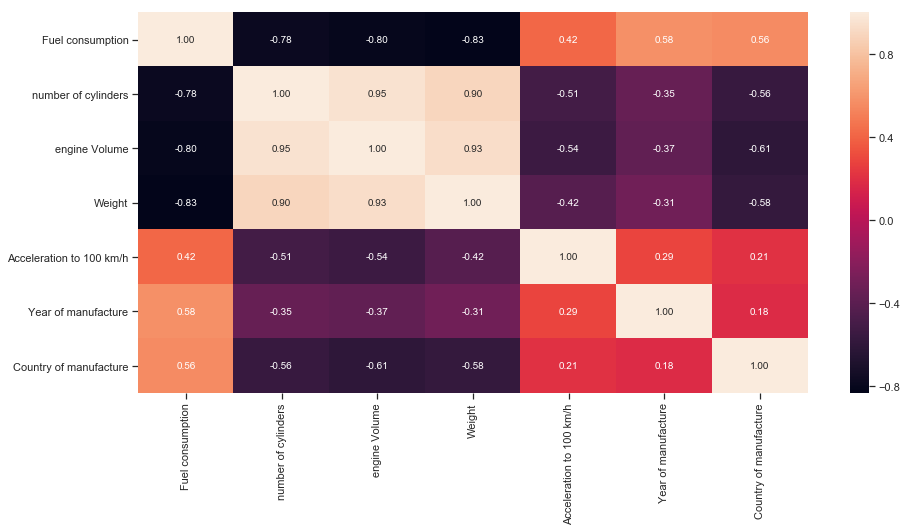

In [581]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

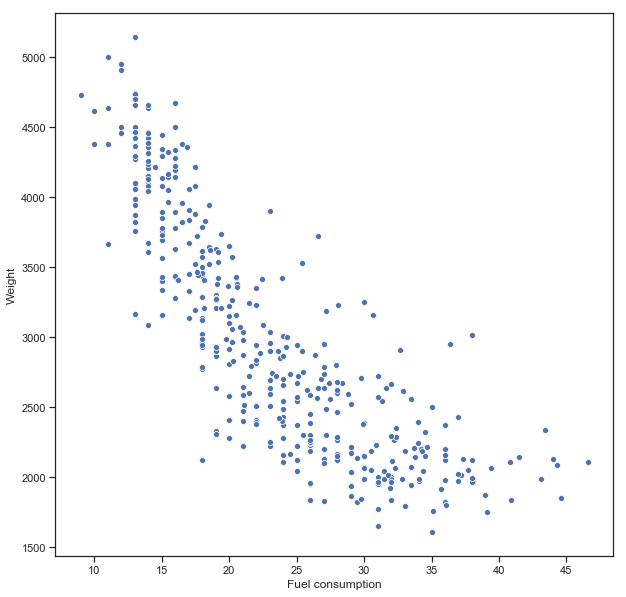

In [582]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Fuel consumption', y='Weight', data=data)

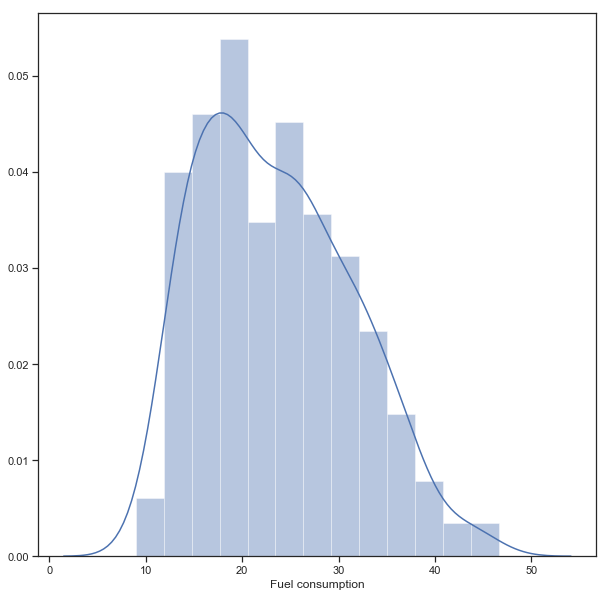

In [583]:
#Гистограмма Позволяет оценить плотность вероятности распределения данных
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Fuel consumption'])

In [584]:
data['inv_weight'] = 0 - data['Weight']
data['inv number of cylinders'] = 0 - data['number of cylinders']
data['inv engine Volume'] = 0 - data['engine Volume']

In [585]:
data['HP1'] = pd.to_numeric(data['HP'], errors = 'coerce')
data['HP2'] = 0 - data['HP1']

In [586]:
data.head()

,Fuel consumption,number of cylinders,engine Volume,HP,Weight,Acceleration to 100 km/h,Year of manufacture,Country of manufacture,inv_weight,inv number of cylinders,inv engine Volume,HP1,HP2
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,-3504.0,-8,-307.0,130.0,-130.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,-3693.0,-8,-350.0,165.0,-165.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,-3436.0,-8,-318.0,150.0,-150.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,-3433.0,-8,-304.0,150.0,-150.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,-3449.0,-8,-302.0,140.0,-140.0


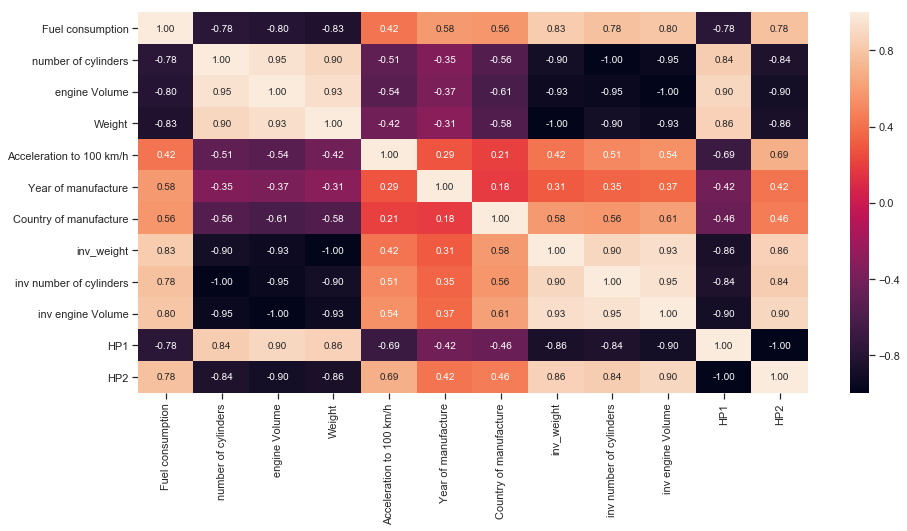

In [587]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [588]:
data.dtypes

Fuel consumption            float64
number of cylinders           int64
engine Volume               float64
HP                           object
Weight                      float64
Acceleration to 100 km/h    float64
 Year of manufacture          int64
 Country of manufacture       int64
inv_weight                  float64
inv number of cylinders       int64
inv engine Volume           float64
HP1                         float64
HP2                         float64
dtype: object

In [589]:
data2 = data[['Fuel consumption', 'Acceleration to 100 km/h', ' Year of manufacture', ' Country of manufacture', 'inv_weight', 'inv number of cylinders','inv engine Volume', 'HP2']]
data2.head()

,Fuel consumption,Acceleration to 100 km/h,Year of manufacture,Country of manufacture,inv_weight,inv number of cylinders,inv engine Volume,HP2
0,18.0,12.0,70,1,-3504.0,-8,-307.0,-130.0
1,15.0,11.5,70,1,-3693.0,-8,-350.0,-165.0
2,18.0,11.0,70,1,-3436.0,-8,-318.0,-150.0
3,16.0,12.0,70,1,-3433.0,-8,-304.0,-150.0
4,17.0,10.5,70,1,-3449.0,-8,-302.0,-140.0


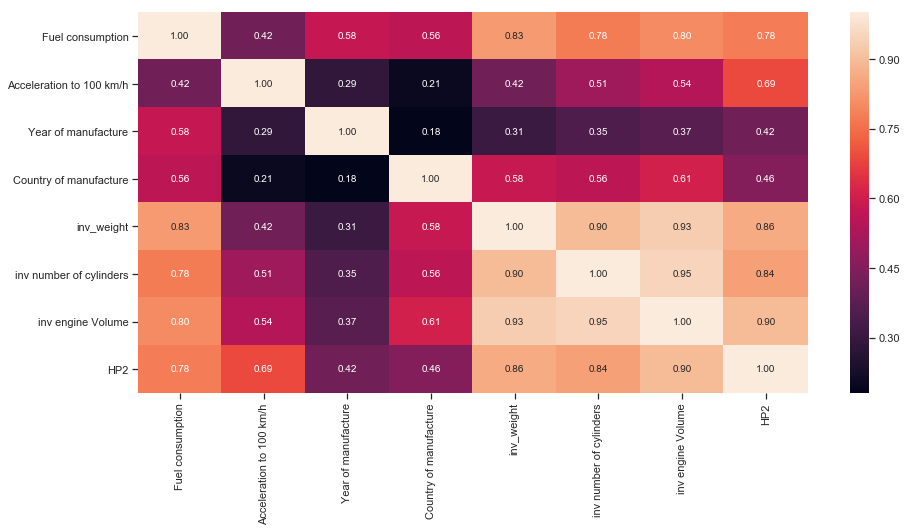

In [590]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data2.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [591]:
data2 = data[['Fuel consumption', 'Acceleration to 100 km/h', ' Year of manufacture', ' Country of manufacture', 'inv_weight']]
data2.head()

,Fuel consumption,Acceleration to 100 km/h,Year of manufacture,Country of manufacture,inv_weight
0,18.0,12.0,70,1,-3504.0
1,15.0,11.5,70,1,-3693.0
2,18.0,11.0,70,1,-3436.0
3,16.0,12.0,70,1,-3433.0
4,17.0,10.5,70,1,-3449.0


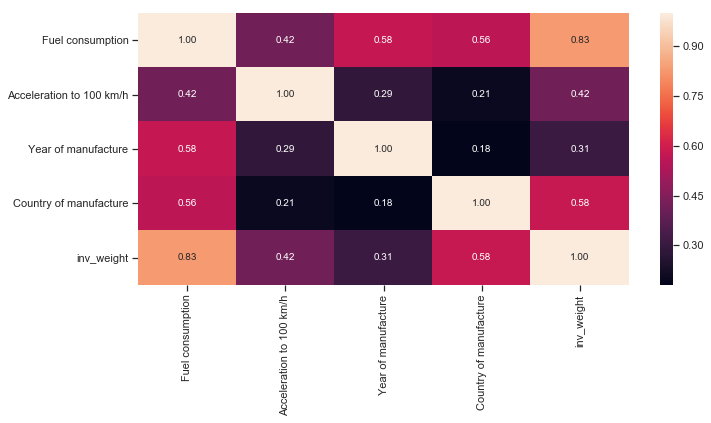

In [592]:
fig, ax = plt.subplots(figsize=(11,5))
sns.heatmap(data2.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

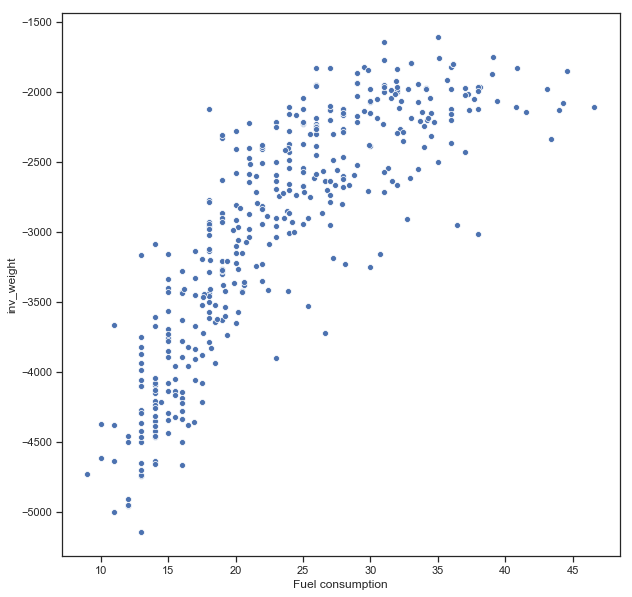

In [593]:
#Диаграмма рассеяния Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости.
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Fuel consumption', y='inv_weight', data=data)

In [594]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
sc1 = MinMaxScaler()
data2[['inv_weight']] = sc1.fit_transform(data2[['inv_weight']])
data2[['Fuel consumption']] = sc1.fit_transform(data2[['Fuel consumption']])
data2[['Acceleration to 100 km/h']] = sc1.fit_transform(data2[['Acceleration to 100 km/h']])
data2[[' Year of manufacture']] = sc1.fit_transform(data2[[' Year of manufacture']])
data2[[' Country of manufacture']] = sc1.fit_transform(data2[[' Country of manufacture']])

C:\Users\cveto\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\cveto\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\cveto\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

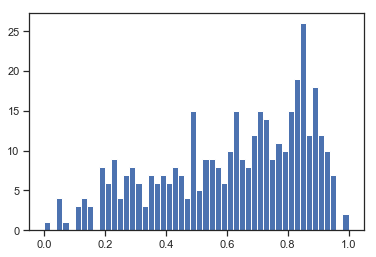

In [595]:
plt.hist(data2['inv_weight'], 50)
plt.show()

In [596]:
data2.head()

,Fuel consumption,Acceleration to 100 km/h,Year of manufacture,Country of manufacture,inv_weight
0,0.239362,0.238095,0.0,0.0,0.463850
1,0.159574,0.208333,0.0,0.0,0.410264
2,0.239362,0.178571,0.0,0.0,0.483130
3,0.186170,0.238095,0.0,0.0,0.483981
4,0.212766,0.148810,0.0,0.0,0.479444


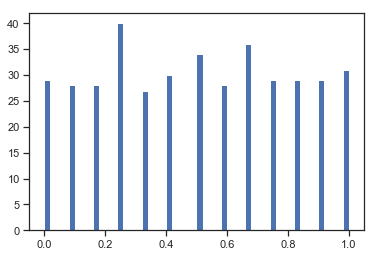

In [597]:
plt.hist(data2[' Year of manufacture'], 50)
plt.show()

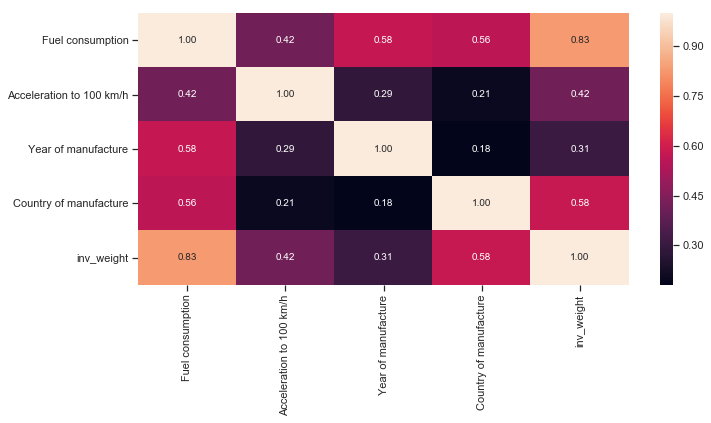

In [598]:
fig, ax = plt.subplots(figsize=(11,5))
sns.heatmap(data2.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

# Разделение выборки

In [599]:
data_x = data2[['Acceleration to 100 km/h', ' Year of manufacture', ' Country of manufacture', 'inv_weight']]
data_y = data2[['Fuel consumption']]

In [600]:
x_array = data2[[  'inv_weight']]
y_array = data2[['Fuel consumption']]

In [601]:
df1 = pd.DataFrame(x_array)
df2 = pd.DataFrame(y_array)

In [602]:
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(
    data_x, data_y, test_size=0.3, random_state=1)
data_X_train.shape, data_X_test.shape

((278, 4), (120, 4))

# Метод ближайших соседей

In [603]:
#2 ближайших соседа
KNN_1 = KNeighborsRegressor(n_neighbors=2)
KNN_1.fit(data_X_train, data_y_train)
target_KNN_1 = KNN_1.predict(data_X_test)
target_KNN_1

array([[0.30585106],
       [0.49734043],
       [0.26462766],
       [0.27393617],
       [0.29654255],
       [0.22606383],
       [0.46542553],
       [0.62632979],
       [0.10638298],
       [0.10638298],
       [0.53191489],
       [0.2606383 ],
       [0.3018617 ],
       [0.49867021],
       [0.68085106],
       [0.39893617],
       [0.13297872],
       [0.2393617 ],
       [0.09308511],
       [0.92287234],
       [0.4787234 ],
       [0.58510638],
       [0.27925532],
       [0.41223404],
       [0.36569149],
       [0.46542553],
       [0.60771277],
       [0.52526596],
       [0.19946809],
       [0.3962766 ],
       [0.58510638],
       [0.13297872],
       [0.3856383 ],
       [0.35904255],
       [0.36303191],
       [0.13297872],
       [0.47207447],
       [0.09308511],
       [0.63829787],
       [0.41223404],
       [0.50531915],
       [0.36303191],
       [0.28457447],
       [0.68218085],
       [0.51994681],
       [0.31914894],
       [0.26861702],
       [0.119

In [604]:
mean_absolute_error(data_y_test, target_KNN_1)

0.07119902482269502

In [605]:
mean_squared_error(data_y_test, target_KNN_1)

0.00968721411932247

In [606]:
median_absolute_error(data_y_test, target_KNN_1)

0.05319148936170212

In [607]:
n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [608]:
clf_gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=LeaveOneOut(), scoring='neg_mean_absolute_error')
clf_gs.fit(data_X_train, data_y_train)

GridSearchCV(cv=LeaveOneOut(), error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [609]:
clf_gs.best_params_

{'n_neighbors': 5}

In [610]:
KNN_2 = KNeighborsRegressor(n_neighbors=5)
KNN_2.fit(data_X_train, data_y_train)
target_KNN_2 = KNN_2.predict(data_X_test)
target_KNN_2

array([[0.32978723],
       [0.60797872],
       [0.25957447],
       [0.34468085],
       [0.29521277],
       [0.19148936],
       [0.47340426],
       [0.75478723],
       [0.15425532],
       [0.11170213],
       [0.45531915],
       [0.25425532],
       [0.26648936],
       [0.41010638],
       [0.69361702],
       [0.39361702],
       [0.14361702],
       [0.24468085],
       [0.09042553],
       [0.76223404],
       [0.39361702],
       [0.54521277],
       [0.35638298],
       [0.39361702],
       [0.34893617],
       [0.44148936],
       [0.69680851],
       [0.61861702],
       [0.19680851],
       [0.51489362],
       [0.54255319],
       [0.14361702],
       [0.38297872],
       [0.37606383],
       [0.39680851],
       [0.13829787],
       [0.46276596],
       [0.09574468],
       [0.6356383 ],
       [0.35638298],
       [0.40957447],
       [0.38085106],
       [0.26329787],
       [0.71489362],
       [0.54414894],
       [0.29734043],
       [0.27819149],
       [0.127

In [611]:
mean_absolute_error(data_y_test, target_KNN_2)

0.0544858156028369

In [612]:
mean_squared_error(data_y_test, target_KNN_2)

0.005259110457220464

In [613]:
median_absolute_error(data_y_test, target_KNN_2)

0.03936170212765959

# Линейная модель

In [614]:
# Аналитическое вычисление коэффициентов регрессии
def analytic_regr_coef(x_array : np.ndarray, 
                       y_array : np.ndarray) -> Tuple[float, float]:
    x_mean = np.mean(x_array)
    y_mean = np.mean(y_array)
    var1 = np.sum([(x-x_mean)**2 for x in x_array])
    cov1 = np.sum([(x-x_mean)*(y-x_mean) for x, y in zip(x_array, y_array)])
    b1 = cov1 / var1
    b0 = y_mean - b1*x_mean
    return b0, b1

In [615]:
b0, b1 = analytic_regr_coef(df1.values, df2.values)
b0, b1

(-0.05692583266798973, 0.7200905238156557)

In [616]:
def y_regr(x_array : np.ndarray, b0: float, b1: float) -> np.ndarray:
    res = [b1*x+b0 for x in x_array]
    return res

In [617]:
y_array_regr = y_regr(df1.values, b0, b1)

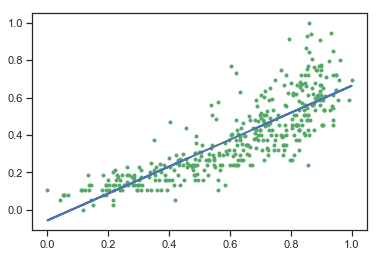

In [618]:
plt.plot(x_array, y_array, 'g.')
plt.plot(x_array, y_array_regr, 'b', linewidth=2.0)
plt.show()

In [619]:
reg1 = LinearRegression().fit(data_X_train, data_y_train)

In [620]:
target_LR_1 = reg1.predict(data_X_test)

In [621]:
mean_absolute_error(data_y_test, target_LR_1)

0.06054253140691239

In [622]:
median_absolute_error(data_y_test, target_LR_1)

0.044738267611060215

In [623]:
mean_squared_error(data_y_test, target_LR_1)

0.006241664755359633

In [624]:
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=LeaveOneOut())
grid.fit(data_X_train, data_y_train)

GridSearchCV(cv=LeaveOneOut(), error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [625]:
grid.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [626]:
reg2 = LinearRegression(copy_X = True, fit_intercept = True, normalize = True).fit(data_X_train, data_y_train)

In [627]:
target_LR_2 = reg2.predict(data_X_test)

In [628]:
mean_absolute_error(data_y_test, target_LR_2)

0.06054253140691239

In [629]:
median_absolute_error(data_y_test, target_LR_2)

0.04473826761106013

In [630]:
mean_squared_error(data_y_test, target_LR_2)

0.006241664755359634

# Метод опорных векторов

In [631]:
xx = df1.values
yy = df2.values
def plot_regr(clf):
    title = clf.__repr__
    clf.fit(xx.reshape(-1, 1), yy)
    y_pred = clf.predict(xx.reshape(-1, 1))
    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_title(title)
    ax.plot(xx, yy, 'b.')
    ax.plot(xx, y_pred, 'ro')
    plt.show()

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


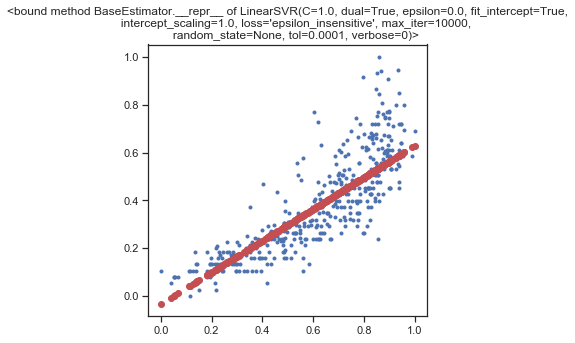

In [632]:
plot_regr(LinearSVR(C=1.0, max_iter=10000))

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


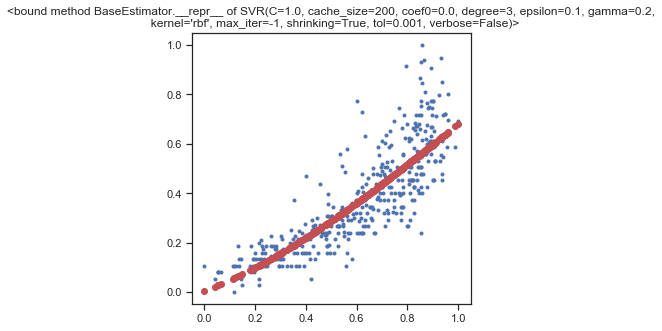

In [633]:
plot_regr(SVR(kernel='rbf', gamma=0.2, C=1.0))

In [634]:
svr_1 = SVR().fit(data_X_train, data_y_train)

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [635]:
target_SVR_1 = svr_1.predict(data_X_test)

In [636]:
mean_absolute_error(data_y_test, target_SVR_1)

0.05486637717610284

In [637]:
median_absolute_error(data_y_test, target_SVR_1)

0.0427367069313212

In [638]:
mean_squared_error(data_y_test, target_SVR_1)

0.005151173302595916

In [639]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid = GridSearchCV(SVR(),param_grid,refit = True, verbose=2)
grid.fit(data_X_train, data_y_train)

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was pass

[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] .

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] .

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] ................ C=10, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ................ C=10, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] .................... C=100, gamma=1, kernel=linear, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] .................... C=100, gamma=1, kernel=linear, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] .................... C=100, gamma=1, kernel=linear, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] .................. C=100, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .................. C=100, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .................. C=100, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] ................ C=100, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ................ C=100, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ................ C=100, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=linear ..............................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.2s
[CV] C=1000, gamma=1, kernel=linear ..................................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.3s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.1s


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   0.2s
[CV] C=1000, gamma=0.1, kernel=linear ................................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   0.3s
[CV] C=1000, gamma=0.1, kernel=linear ................................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=linear ..............................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=1000, gamma=0.001, kernel=linear, total=   0.3s
[CV] C=1000, gamma=0.001, kernel=linear ..............................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=1000, gamma=0.001, kernel=linear, total=   0.3s
[CV] C=1000, gamma=0.001, kernel=linear ..............................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=1000, gamma=0.001, kernel=linear, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=linear .............................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] .............. C=1000, gamma=0.0001, kernel=linear, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=linear .............................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............. C=1000, gamma=0.0001, kernel=linear, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=linear .............................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............. C=1000, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.0s


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    7.2s finished
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` paramet

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [640]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [641]:
svr_2 = SVR(C=1, gamma = 1, kernel = 'rbf').fit(data_X_train, data_y_train)

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [642]:
target_SVR_2 = svr_2.predict(data_X_test)

In [643]:
mean_absolute_error(data_y_test, target_SVR_2)

0.05961968675305874

In [644]:
median_absolute_error(data_y_test, target_SVR_2)

0.04748506255895846

In [645]:
mean_squared_error(data_y_test, target_SVR_2)

0.005698569367445438

# Ансамблевые модели

# RandomForestRegressor

In [646]:
rf_rg_1 = RandomForestRegressor(random_state=1)
rf_rg_1.fit(data_X_train, data_y_train)

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cveto\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [647]:
target_RFR_1 = rf_rg_1.predict(data_X_test)

In [648]:
mean_absolute_error(data_y_test, target_RFR_1)

0.05521941489361702

In [649]:
median_absolute_error(data_y_test, target_RFR_1)

0.0361702127659575

In [650]:
mean_squared_error(data_y_test, target_RFR_1)

0.0060227838058322025

In [651]:
tuned_parameters = {'n_estimators': [500, 700, 1000], 'max_depth': [None, 1, 2, 3]}

In [652]:
CV_rfr = GridSearchCV(RandomForestRegressor(), param_grid=tuned_parameters, cv=LeaveOneOut(), n_jobs=-1, verbose=1)

In [653]:
#CV_rfr.fit(data_X_train, data_y_train)

In [654]:
#CV_rfr.best_params_

In [655]:
rf_rg_2 = RandomForestRegressor(random_state=1, max_depth = None, n_estimators = 500)
rf_rg_2.fit(data_X_train, data_y_train)

C:\Users\cveto\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [656]:
target_RFR_2 = rf_rg_2.predict(data_X_test)

In [657]:
mean_absolute_error(data_y_test, target_RFR_2)

0.05662872340425549

In [658]:
median_absolute_error(data_y_test,  target_RFR_2)

0.041412234042552884

In [659]:
mean_squared_error(data_y_test,  target_RFR_2)

0.006049715085068691

# AdaBoost

In [660]:
ab_1 = AdaBoostRegressor(random_state=1, base_estimator = RandomForestRegressor(random_state=1, max_depth = None, n_estimators = 500))
ab_1.fit(data_X_train, data_y_train)

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False),
         learning_rate=1.0, loss='linear', n_estimators=50, random_state=1)

In [661]:
target_AB_1 = ab_1.predict(data_X_test)

In [662]:
mean_absolute_error(data_y_test, target_AB_1)

0.06018953900709213

In [663]:
median_absolute_error(data_y_test, target_AB_1)

0.04712234042553107

In [664]:
mean_squared_error(data_y_test, target_AB_1)

0.006522004020955906

In [665]:
parameters = {'n_estimators': (1, 2), 'base_estimator__max_depth': (1, 2)}

In [666]:
CV_ab = GridSearchCV(ab_1, parameters)

In [667]:
CV_ab.fit(data_X_train, data_y_train)

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_wei...se=0, warm_start=False),
         learning_rate=1.0, loss='linear', n_estimators=50, random_state=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': (1, 2), 'base_estimator__max_depth': (1, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [668]:
CV_ab.best_params_

{'base_estimator__max_depth': 2, 'n_estimators': 1}

In [669]:
ab_2 = AdaBoostRegressor(random_state=1, base_estimator = rf_rg_2, n_estimators = 1)
ab_2.fit(data_X_train, data_y_train)

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False),
         learning_rate=1.0, loss='linear', n_estimators=1, random_state=1)

In [670]:
target_AB_2 = ab_2.predict(data_X_test)

In [671]:
mean_absolute_error(data_y_test, target_AB_2)

0.05466037234042558

In [672]:
median_absolute_error(data_y_test, target_AB_2)

0.04418351063829749

In [673]:
mean_squared_error(data_y_test, target_AB_2)

0.0051508778854497

# GradientBoosting

In [674]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
gb_1 = GradientBoostingRegressor(random_state=1)
gb_1.fit(data_X_train, data_y_train)

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=1, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [675]:
target_GB_1 = gb_1.predict(data_X_test)

In [676]:
median_absolute_error(data_y_test, target_GB_1)

0.038045270769946654

In [677]:
mean_squared_error(data_y_test, target_GB_1)

0.005590461318671884

In [678]:
mean_absolute_error(data_y_test, target_GB_1)

0.05427053883863619

In [679]:
parameters = {
   "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

In [680]:
#CV_rfc = GridSearchCV(gbb, parameters, cv=10, n_jobs=-1)
#CV_rfc.fit(data_X_train, data_y_train)

In [681]:
#CV_rfc.best_params_

In [682]:
gb_2 = GradientBoostingRegressor(random_state=1, criterion = 'friedman_mse', learning_rate = 0.2, max_depth = 5, max_features = 'log2', min_samples_leaf = 0.1, min_samples_split = 0.2090909090909091, n_estimators = 10, subsample= 0.9)
gb_2.fit(data_X_train, data_y_train)

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=5,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=0.1, min_samples_split=0.2090909090909091,
             min_weight_fraction_leaf=0.0, n_estimators=10,
             n_iter_no_change=None, presort='auto', random_state=1,
             subsample=0.9, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [683]:
target_GB_2 = gb_2.predict(data_X_test)

In [684]:
median_absolute_error(data_y_test, target_GB_2)

0.04474290331745032

In [685]:
mean_squared_error(data_y_test, target_GB_2)

0.0053044276929888005

In [686]:
mean_absolute_error(data_y_test, target_GB_2)

0.056525922659344086

# Анализ

In [687]:
#1 - KNN
#2 - Линейная
#3 - Опорные векторы
#4 - Случайный лес
#5 - AdaBoost
#6 - GradientBoost

In [703]:
d2 = [{"GS": 0, "model_№": 1, "model": "KNN", "mean_absolute_error" : mean_absolute_error(data_y_test, target_KNN_1), "median_absolute_error": median_absolute_error(data_y_test, target_KNN_1), 
     "mean_squared_error": mean_squared_error(data_y_test, target_KNN_1)}, {"GS": 0,"model_№": 2, "model": "LR","mean_absolute_error" : mean_absolute_error(data_y_test, target_LR_1), "median_absolute_error": median_absolute_error(data_y_test, target_LR_1), 
     "mean_squared_error": mean_squared_error(data_y_test, target_LR_1)}, {"GS": 0,"model_№": 3, "model": "SVR", "mean_absolute_error" : mean_absolute_error(data_y_test, target_SVR_1), "median_absolute_error": median_absolute_error(data_y_test, target_SVR_1), 
     "mean_squared_error": mean_squared_error(data_y_test, target_SVR_1)}, {"GS": 0,"model_№": 4, "model": "RFR", "mean_absolute_error" : mean_absolute_error(data_y_test, target_RFR_1), "median_absolute_error": median_absolute_error(data_y_test, target_RFR_1), 
     "mean_squared_error": mean_squared_error(data_y_test, target_RFR_1)}, {"GS": 0,"model_№": 5, "model": "AB", "mean_absolute_error" : mean_absolute_error(data_y_test, target_AB_1), "median_absolute_error": median_absolute_error(data_y_test, target_AB_1), 
     "mean_squared_error": mean_squared_error(data_y_test, target_AB_1)}, {"GS": 0,"model_№": 6, "model": "GB", "mean_absolute_error" : mean_absolute_error(data_y_test, target_GB_1), "median_absolute_error": median_absolute_error(data_y_test, target_GB_1), 
     "mean_squared_error": mean_squared_error(data_y_test, target_GB_2)}, {"GS": 1,"model_№": 1, "model": "KNN", "mean_absolute_error" : mean_absolute_error(data_y_test, target_KNN_2), "median_absolute_error": median_absolute_error(data_y_test, target_KNN_2), 
     "mean_squared_error": mean_squared_error(data_y_test, target_KNN_2)}, {"GS": 1,"model_№": 2, "model": "LR","mean_absolute_error" : mean_absolute_error(data_y_test, target_LR_2), "median_absolute_error": median_absolute_error(data_y_test, target_LR_2), 
     "mean_squared_error": mean_squared_error(data_y_test, target_LR_2)}, {"GS": 1,"model_№": 3, "model": "SVR", "mean_absolute_error" : mean_absolute_error(data_y_test, target_SVR_2), "median_absolute_error": median_absolute_error(data_y_test, target_SVR_2), 
     "mean_squared_error": mean_squared_error(data_y_test, target_SVR_2)}, {"GS": 1,"model_№": 4, "model": "RFR", "mean_absolute_error" : mean_absolute_error(data_y_test, target_RFR_2), "median_absolute_error": median_absolute_error(data_y_test, target_RFR_2), 
     "mean_squared_error": mean_squared_error(data_y_test, target_RFR_2)}, {"GS": 1,"model_№": 5, "model": "AB", "mean_absolute_error" : mean_absolute_error(data_y_test, target_AB_2), "median_absolute_error": median_absolute_error(data_y_test, target_AB_2), 
     "mean_squared_error": mean_squared_error(data_y_test, target_AB_2)}, {"GS": 1,"model_№": 6, "model": "GB", "mean_absolute_error" : mean_absolute_error(data_y_test, target_GB_2), "median_absolute_error": median_absolute_error(data_y_test, target_GB_2), 
     "mean_squared_error": mean_squared_error(data_y_test, target_GB_2)}  ]

In [704]:
dd2 = pd.DataFrame(d2)

In [705]:
print(dd2)
dd2.to_csv('dd2.csv')

    GS  mean_absolute_error  mean_squared_error  median_absolute_error model  \
0    0             0.071199            0.009687               0.053191   KNN   
1    0             0.060543            0.006242               0.044738    LR   
2    0             0.054866            0.005151               0.042737   SVR   
3    0             0.055219            0.006023               0.036170   RFR   
4    0             0.060190            0.006522               0.047122    AB   
5    0             0.054271            0.005304               0.038045    GB   
6    1             0.054486            0.005259               0.039362   KNN   
7    1             0.060543            0.006242               0.044738    LR   
8    1             0.059620            0.005699               0.047485   SVR   
9    1             0.056629            0.006050               0.041412   RFR   
10   1             0.054660            0.005151               0.044184    AB   
11   1             0.056526            0

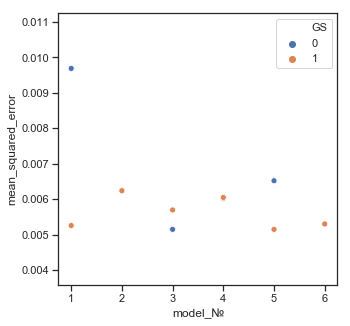

In [722]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x='model_№', y='mean_squared_error', data=dd2, hue='GS')

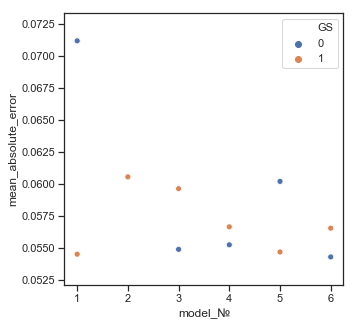

In [723]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x='model_№', y='mean_absolute_error', data=dd2, hue='GS')

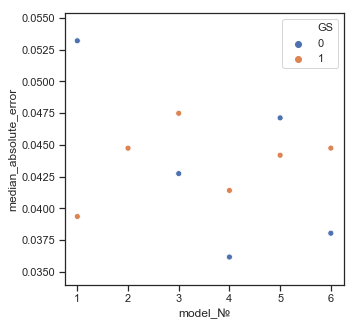

In [724]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x='model_№', y='median_absolute_error', data=dd2, hue='GS')

In [709]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [711]:
pysqldf("""select GS, model, mean_absolute_error from dd2 order by mean_absolute_error""")

,GS,model,mean_absolute_error
0,0,GB,0.054271
1,1,KNN,0.054486
2,1,AB,0.054660
3,0,SVR,0.054866
4,0,RFR,0.055219
5,1,GB,0.056526
6,1,RFR,0.056629
7,1,SVR,0.059620
8,0,AB,0.060190
9,0,LR,0.060543


In [712]:
pysqldf("""select GS, model, median_absolute_error from dd2 order by median_absolute_error""")

,GS,model,median_absolute_error
0,0,RFR,0.036170
1,0,GB,0.038045
2,1,KNN,0.039362
3,1,RFR,0.041412
4,0,SVR,0.042737
5,1,AB,0.044184
6,1,LR,0.044738
7,0,LR,0.044738
8,1,GB,0.044743
9,0,AB,0.047122


In [714]:
pysqldf("""select GS, model, mean_squared_error from dd2 order by mean_squared_error""")

,GS,model,mean_squared_error
0,1,AB,0.005151
1,0,SVR,0.005151
2,1,KNN,0.005259
3,0,GB,0.005304
4,1,GB,0.005304
5,1,SVR,0.005699
6,0,RFR,0.006023
7,1,RFR,0.006050
8,0,LR,0.006242
9,1,LR,0.006242


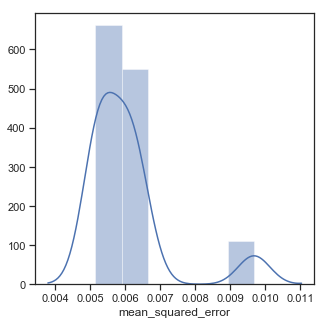

In [716]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.distplot(dd2['mean_squared_error'])

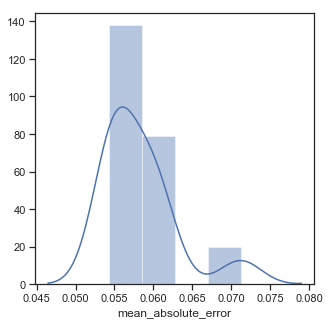

In [717]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.distplot(dd2['mean_absolute_error'])

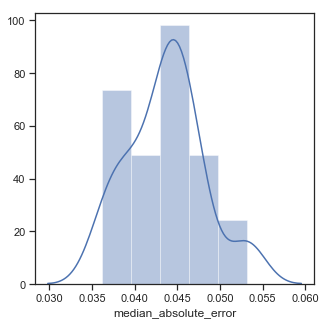

In [718]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.distplot(dd2['median_absolute_error'])

In [725]:
print(data['Fuel consumption'].describe())

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: Fuel consumption, dtype: float64


In [727]:
print(dd2['mean_absolute_error'].describe())

count    12.000000
mean      0.058229
std       0.004795
min       0.054271
25%       0.054815
50%       0.056577
75%       0.060278
max       0.071199
Name: mean_absolute_error, dtype: float64


In [728]:
print(dd2['median_absolute_error'].describe())

count    12.000000
mean      0.043661
std       0.004605
min       0.036170
25%       0.040900
50%       0.044461
75%       0.045338
max       0.053191
Name: median_absolute_error, dtype: float64


In [729]:
print(dd2['mean_squared_error'].describe())

count    12.000000
mean      0.006053
std       0.001243
min       0.005151
25%       0.005293
50%       0.005861
75%       0.006242
max       0.009687
Name: mean_squared_error, dtype: float64
